## Clustering

*(Memorization is not learning!)*


#### Prerequisites
***
- Introductory machine learning knowledge
- Data preparation and feature engineering knowledge
- Basic knowledge on data distributions, such as Gaussian and power law distributions.
***

### What is Clustering?
***
Clustering is an unsupervised machine learning algorithm that discovers data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups.
Let's understand this with an example.   
1- When we try to understand or learn something about music, one way is that we might look for meaningful groups/collections. We might organize music by genere, while others might organize music by decade. How we choose to group items help us to understand more about individual pieces of music. 

2- Customer segmentation which is a process of classifying similar customers into the same segment. Clustering algorithm helps us to better understand customers, in term of both static demographics and dynamic behaviours. Customer with comparable characteristics often interact with business similarly, thus business can benefit from this technique by creating tailored marketing strategy for each segment. In *tailored marketing*, sellers decide when and how they will contact customers and which products will showcased on a specific day. 

In ML also, we often group examples as a first step to understand a subject(data sets). Grouping unlabled examples is called clustering.
Since the examples are unlabled, clustering relies on unsupervised ML. If the examples are labled, then clustering becomes classification.
***

### Type of Clustering
***
Clustering can be divided into 2 subgroups:

<b>1-Hard Clustering:</b> Data point either belongs to a cluster completely or not. For example, in customer segmentation, customer can be put into one group out of 8 groups.

<b>2-Soft Clustering:</b> Here instead keeping each data point into a separate cluster, a probability or likelihood of that data point to be in those clusters is assigned. For example, in customer segmentation, each customer is assigned a probability to be in either of 8 clusters of the retail shop.
***

### Types of clustering algorithms
***
- <b>Connectivity models:</b> This model follow 2 approaches, in first approach it start with classifying all data points into separate clusters and then start aggregating them as the distance decreases. In second approach, all data points are classified as a single cluster and then partitioned as the distance increases. Here the choice of distance function is subjective. Models come under this algorithm are very easy to interpret but lacks scability of handling big datasets. Hierarchical clustering algorithm and it's variant comes under this.

- <b>Centroid models:</b> This is a iterative clustering algorithm in which the similarity of data points is derived by the closeness of a data point to the centroid of clusters. This algo run iteratively to find the local optima. K-means clustering comes under this.
- <b>Distribution models:</b> This clustering algorithm is based on the notion of how probable is that all data points in the cluster belong to the same distribution(Normal, Gaussian distribution). This algo often suffer from overfitting. A popular example of this algo is Expectation-maximization algorithm which uses multivariate normal distributions.
- <b>Density models:</b> This algorithm search the data space for area of varied density of data points in the data space. It isolates various different density regions and assign the data points within these regions in the same cluster. DBSCAN and OPTICS are come under this.
***

### Clustering Workflow
***
These are the following steps for clustering:
- 1: Prepare data
- 2: Create similarity metric
- 3: Run clustering algorithm
- 4: Interpret results and adjust clustering.(hyperparameter tunning)


- **Prepare Data:** 
     - Feature data must transform, normalize and scale.
     - Ensure the prepared data must accurately able to calculate the similarity between examples.
     
- **Create Similarity Metrics:**
     - Before to use clustering algorithm, it is important to know how similar pairs of examples are.
     - Quantify the similarity between examples by creating a similarity metrics.
     - Creating a similarity metric requires to understand data carefully and how to derive      similarity from feature.
     
- **Run Clustering Algorithm:**
     - Clustering algorithm uses the similarity metric to cluster the data.
     
- **Interpret Results and Adjust Clustering:**
     - This process is iterative and exploratory because clustering lacks *truth* that can verify the output.
***

## - Prepare Data
In clustering, we calculate the similarity between two examples by combining all the feature data for those examples into a numeric value. Combining feature data requires that the feature data have the same scale. Here are the few techniques of ***data scaling***:

<img src="img-doc/scale.jpg" width=300/>

***Why should we use feature scaling?***
ML algorithms works on number and doesn't know what the number represents.A price of 10 rupees and weight of 10 grams represents completely two different things, which is okay to understand by human brain, but for a model as a feature, it treats both as a same.
Suppose if we have two features which is weight and price:

   
| Fruit   | Weight  | Price  |
|---------|---------|--------|
| Orange  | 15      | 1      |
| Apple   | 18      | 3      |
| Banana  | 12      | 2      |
| Grapes  | 10      | 5      |
       
       
 Here the weight and price are not meaningful comparison and in ML algorithm since Weight > Price, thus Weight is more important feature than Price. So these more significant numbers starts playing a more decisive role, thus feature scaling is needed to bring to give upfront importance to every feature.
 
 Another reason for *feature scaling* is for the machine learning algorithms like *linear regression, logistic regression, neaural network etc* that uses ***gradient decent*** as an optimization technique. ![gradient-decent](img-doc/gradient-decent.jpg) 
 
- The feature value *X* in this formula will affect the step size of the gradient decent.
- The difference in range of features(weight, price) will cause different step sizes for each feature, so ensure that the gradient decent moves smoothly towards the minima and also the steps for gradient decent are updated at the same rate for all features, feature scaling is needed before the play with models.
![Gradient-decent-scale](img-doc/gradient-scaling1.jpg)
  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; x1 >> x2               &emsp; &emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;        (0 < x1 < 1),  (0 < x2 < 1)

- ***Normalizing Data:***

Normalization is used when:
       - Data has a Gaussian distribution.
       - Data set lacks enough data to create quantiles.
Normalization/Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation.

Here is the formula : 
![standarization](img-doc/standarization.jpg)


        WEIGHT  PRICE
Orange      15      1
Apple       18      3
Banana      12      2
Grape       10      5
          WEIGHT     PRICE
Orange  0.412393 -1.183216
Apple   1.402136  0.169031
Banana -0.577350 -0.507093
Grape  -1.237179  1.521278


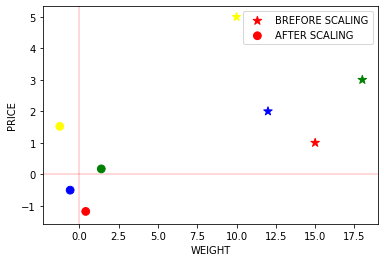

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.DataFrame({'WEIGHT': [15, 18, 12,10],
                   'PRICE': [1,3,2,5]},
                   index = ['Orange','Apple','Banana','Grape'])
print(df.head())

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_feature = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])
print(normalized_feature.head())

# plot
ax = df.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'], 
                     marker = '*',s=80, label='BREFORE SCALING');
normalized_feature.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax)
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);

***Min/Max Scaler***

        WEIGHT  PRICE
Orange   0.625   0.00
Apple    1.000   0.50
Banana   0.250   0.25
Grape    0.000   1.00


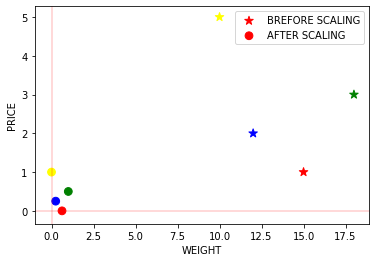

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_feature = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])
print(scaled_feature.head())

# plot
ax = df.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'], 
                     marker = '*',s=80, label='BREFORE SCALING');
scaled_feature.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax);
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);

#### Log Transformation:
Power-law relationships of the form y = a*pow(x,b) 
In statistics, a power law is a functional relationship between two quantities, where a relative change in one quantity results in a proportional relative change in the other quantity(one quantity varies as a power of another)

![Power-LawDistribution](img-doc/power-law.jpg)
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; *power-law distribution*

The *Log transform* used to make a highly skewed distribution to less skewed.Process a power-law distribution by using a log transform
![Gaussian](img-doc/gaussian-distribution.jpg)
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; *gaussian-distribution*

          WEIGHT     PRICE
Orange  0.500180 -1.368084
Apple   1.324116  0.358244
Banana -0.504405 -0.358249
Grape  -1.319891  1.368089


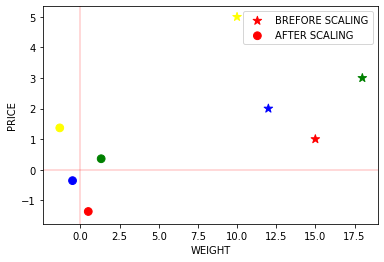

In [11]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson')
power_transformed_df = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])
print(power_transformed_df)

# plot
ax = df.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'], 
                     marker = '*',s=80, label='BREFORE SCALING');
power_transformed_df.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax)
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);

#### Quantile Transformer
- Normalization and Log transform address specific data distribution.
- What if data doesn't confirm to a Guassian or power-law distribution. Is there any general technique which can apply to any distribution.

- In quantile, we divide the data into intervals where each interval contains an equal number of examples. These interval boundaries are called ***quantiles***.

These are the following steps which use to convert data into quantiles:
- 1- Decide the number of intervals.
- 2- Define intervals such that each interval has an equal number of examples.
- 3- Replace each example by the index of the interval it falls in.
- 4- Bring the indexes to same range as other feature data by scaling the index values to [0, 1].

          WEIGHT     PRICE
Orange  0.666667  0.000000
Apple   1.000000  0.666667
Banana  0.333333  0.333333
Grape   0.000000  1.000000


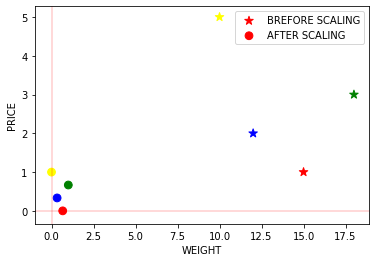

In [15]:
from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer(n_quantiles=4)
qunatized_df = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])
print(qunatized_df)

# plot
ax = df.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'], 
                     marker = '*',s=80, label='BREFORE SCALING');
qunatized_df.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax,figsize=(6,4))
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);

## - Create Similarity Metrics
In statistics and related fields, similarity metrics or similarity function is a real-valued function that quantifies the similarity between two objects. And in data science this is a way of measuring how data samples are related or closed to each other.

Cosine similarity is a commonly used similarity measure for real-valued vectors, used in information retrieval to score the similarity of documents in the vector space model.
In ML, common kernal functions such as the RBF kernal can be viewed as similarity functions. It also used in *classification(like KNN)*, where data objects objects are labeled based on the *feature's similarity*. An another example can be for anomaly detection where we talk about dissimilar outliers compared to other data samples. 

***
The similarity measure is usually expressed as a numeric value. To calculate the similarity between two examples(objects), it need to combine all the feature data for those two examples(objects) into a single numeric value.

Let's take a example to understand this, consider a shirt data set with one feature: *shirt size*. If we ask to find how similar two shirts are by calculating the difference between their sizes. Smaller the numeric difference between sizes, greater the similarity between shirts. This similarity measure technique is called **manual similarity measure**. 

Let's make little complicate this, what if we want to find similarities between shirts by using size and color both. Color is categorical data, and hard to combine with numeric feature size data. When the data become complex enough, and we won't be able to create a manual measure, then switch to a **supervised similarity measure** where a supervised ML model calculates the similarity. This technique will discuss later, let's focus on manual similarity measure.

Suppose the model has two features: shirt size and shirt price data. Since both features are numeric, we can combine them into a single number representing similarity as follows:
***
- Size(s): Shirt size probably forms a Gaussian distribution. Confirm this, then normalize the data.
- Price (p): The data is probably a Poisson distribution. Confirm this. If you have enough data, convert the data to quantiles and scale to.
- Combine the data by using root mean squared error (RMSE). Here, the similarity is $$\Large\sqrt{\frac{s^{2}+p^{2}}{2}}$$


Calculate the similarity for two shirts whose sizes are 8 and 11, and prices are 120 and 150. Since we don't have enough data to understand the distribution, we'll simply scale the data without normalizing or quantiles.


- Step-1 Scale size: Assume maximum possible shirt size is 20. 
                 1st shirt size => 8/2 = 0.4
                 2nd shirt size => 11/2 = 0.55
- Step-2 Scale price: Assume maximum price of shirt is 150
                 1st shirt price => 120/150 = 0.8
                 2nd shirt price => 150/150 = 1.0
- Step-3 Differences
                 size = 0.55-0.4 => 0.15
                 price = 1-0.8 => 0.2
- Step-4 RMSE=$$\sqrt{\frac{0.2^{2}+0.15^{2}}{2}} = 0.17$$

Intuitively, your measured similarity should increase when feature data becomes similar. Instead, your measured similarity actually decreases. Make your measured similarity follow your intuition by subtracting it from 1.

Similarity = 1-0.17 => 0.83



Now let's take an another scenario where you have categorical data, and categorical data can either be:

> ***Single valued (univalent)***, such as a shirts's color ("white" or "blue" but never both)                                 
> ***Multi-valued (multivalent)***, such as a movie's genre (can be "romance" and "comedy" simultaneously, or just "comedy")

Similarity of ***univalent data*** can be represented either by ***'1' or '0'***.
But similarity for ***multivalent data*** is harder to deal.
For example, movie genres can be a challenge to work with. To handle this problem, suppose movies are assigned genres from a fixed set of genres. Calculate similarity using the ratio of common values, called Jaccard similarity.

Examples:

    ["comedy","romance"] and ["comedy","romance"] = 1
    ["comedy","romance"] and ["romance"] = ½
    ["comedy","romance"] and ["romance", "drama"] = ⅓
    ["comedy","romance"] and ["sci-fi","biographical"] = 0

Let's take some more example to understand that how to deal with categorical data.
	
- Postal code: Postal codes representing areas that are close to each other should have a higher similarity. To encode the info required to calculate this similarity accurately, we can convert the postal codes into latitude/longitude. For a pair of postal codes, separately calculate the difference between their latitude and their longitude. Then add the differences to get a single numeric value.
- Color: Let's assume we have color data as text. To find the similarity for color, convert the textual values into numeric RGB values. Now we can find the difference in red, green, and blue values for two colors, and combine the differences into a numeric value by using the Euclidean distance.

In general, similarity measure must directly correspond to the actual similarity. If your metric does not, then it isn’t encoding the necessary information. In postal-code example, converted postal codes into latitude/longitude because postal codes by themselves did not encode the necessary information.

We need to be carefull while processing data, before creating the *similarity measure*.
Although the above explained examples are simple data set, but in real-world data sets are far bigger and far more complex.

***NOTE:*** Remember that quantiles are a good default choice for processing numeric data.

In clustering, we use different type of distance metrics, let's understand what all different types of distance metrics. 

### Metrics:
A given distance can be a metric if it satisfy the below given conditions:
- Non-Negative: d(p,q)>=0, for any distinct observations p and q.
- Symmetry: d(p, q) = d(q, p) for all p and q.
- Triangle Inequality: d(p, q) ≤ d(p, r) + d(r, q) for all p, q, r.
- d(p, q) = 0 only if p = q.

 Distance measures is fundamental principle to measure the similarity between given data samples. Thus choosing **distance metrics** can be a strong influence on the performance of the classifier/clustering.
 
Before to jump into distance metrics, let's get a little bit intution on *norm*.

### Norm
In mathematics, norm is a function that assigns a strictly positive length/size to each vector in a vector space(real or complex vector space). It commutes with scaling, obeys a form of the **triangle inequality** and is zero only at origin.

Euclidean distance of a vector from the origin is a norm called **Euclidean norm or L2 norm**.

#### Commonly used Norms
The most commonly used normed are clubbed under **p-norms** and is denoted by **$||x||_{p}$**
   where p is +ve integer numbers.
   
$$\Large||x||_p = (\sum_{i=1}^{n}x_{i}^{p})^\frac{1}{p}$$

**Norms Types:**
![norm-diag](img-doc/norm-diag.jpg)


#### 1: L1-norm (Taxicab norm or Manhattan norm)
![N1-normDiag](img-doc/N1-normDiag.jpg)
`L1-norm ||x|| = power(3+4, 1) => 7`

The Manhattan norm is also called N1-norm.
![manhattan-norm](img-doc/manhattan-norm.jpg)


#### 2: L2-norm(Euclidean Norm):
![L2-normDiag](img-doc/L2-normDiag.jpg)
This gives a distance from origin point to point *X*. Here vector space x=(x1, x2, ...xn)
![euclidean-norm](img-doc/euclid-norm.jpg)

The inner product of two vectors(x1, x2) of a *Euclidean vector space* is the *dot product* of their *coordinate vectors*. Euclidean can also be written in cooridinate-free way:
   `||x|| = sqrt(x1.x2)`
  
  
#### 3: Infinity-norm or Maximum norm
![infinity-norm](img-doc/infinity-norm.jpg)
***
The infinity-norm returns maximum absolute value in the given vector.
***Infinity norm ||x|| = max( |x1|, |x2|, ..|xn| )***

Example: Find the infinity-norm of vector `x = [4, 5, -7]`
then                `||x|| = 7`

***
#### Absolute Value Norm:
![absolute-normDiag](img-doc/absolute-normDiag.jpg)
absolute value norm = $||x|| = |x|$ is a norm on 1-dimensional vector spaces formed by the *real or complex numbers*.


### Distance functions:

#### 1- L2 norm, Euclidean distance: 
L1 norm: sum of the absolute values of each element of x vector.
 
L2 norm: 1/2 power of the sum of squares of the elements of x vector. L2 norm is also called Euclidean norm.
Euclidean formula: 
![eucl-formula](img-doc/eucl-formula.jpg)
![euclid-manh-ch](img-doc/euclid-manh-ch.jpg)
 
Euclidean distance properties as show below:
![euclid-properties](img-doc/euclid-properties.jpg)

#### 2-  L1 norm, Manhattan distance: 
This metrics(methods) is used to compute the distance between source and destination where it is nearly imposible to move in a straight line. Example- Measuring the distance between two streets in a given city.
 
Manhattan distance in n-dimensional space:
$ d(P,Q) = ||P-Q||_1 = \sum_{i}^{n} |P_{i}-Q_{i}|$
  
![manhattan-dist](img-doc/manhattan-dist.jpg)
 
#### 3- Canberra distance: 
It's weighted version of manhattan distance. 
$ d(P,Q) = \sum_{i=1}^{n} \frac{|p_{i}-q_{i}|}{|p_{i}+q_{i}|}  \\                                                                    =\frac{|p_{1}-q_{1}|}{|p_{1}+q_{1}|} + \frac{|p_{2}-q_{2}|}{|p_{2}+q_{2}|}+....+\frac{|p_{n}-q_{n}|}{|p_{n}+q_{n}|}$
 
 
#### 4- L-infinity norm, Chebyshev/Maximum distance: 
The chebyshev distance between two n-D space observations or vectors is equal to the maximum absolute value of the variations between the data samples coordinates.
 Chebyshev distance between two points P and Q: $d(P,Q) = max|p_{i}-q_{i}|$
 
 Also Chebyshev distance is a metrics if it satisfy these four coditions:
 
 * d(P,Q)=0 if P=Q
 * d(P,Q) = d(Q,P) if $|x_{2}-x_{1}|=|x_{1}-x_{2}|$
 * d(P,Q)< d(P,R) + d(R,Q)
 * d(P,Q) = d(P,R) + d(R,Q)
 
Chebyshev distance is also used in chessboard where the number of moves for a queen or king is equal to distance in order to reach a neighbour square.
![chebyshev-queen](img-doc/chebyshev-queen.jpg)
 
#### 5- Lp norm, Minkowski distance: 
The ***Minkowski distance*** is just a generalization of above mentioned metrics(Euclidean, Manhattan, and Chebyshev).
                                                                                                                               
$d(P,Q) = |P_{i}-Q_{i}|_{p} = (\sum_{i=1}^{n}|p_{i}-q_{i}|^{p})^{\frac{1}{p}}$
 * p=1 :: Manhattan distance
 * p=2 :: Euclidean distance
 * $p \to +\infty$ :: Chebyshev distance
 * $p \to 0$ :: Logical AND
 * $p \to -\infty$ :: Min distance
 
#### 6- Cosine distance: 
This metrics widely used in text data mining, nlp and information retrieval systems.
It also used to measure the similarity between given n text documents.
$$ Cosine Distance = 1 - CosineSimilarity$$
$$
= (1 - cos(x,y))  
$$

$$
= 1- {\frac{(x.y)}{||x||.||y||}} 
$$

$$
=1 - \frac{\sum_{i=1}^{n}P_{i}.Q_{i}}{\sqrt{\sum_{i=1}^n P_{i}^2}.\sqrt{\sum_{i=1}^n Q_{i}^2}}
$$                 
                    
Let's take a example to understand this math. Let's say we have 2 documents:
* Document 1 : "Hello Hello Hello Pratyush"
* Document 2 : "Pratyush Pratyush Hello Hello"

Let's denote the word "Pratyush" as x-axis and the word "Hello" as y-axis. It means the document A can be represented as a vector A(3,1) and document B(2,2).

Now, Cosine Similarity:                                                                                                         
 A(3,1),  B(2,2)                                                                                                               
 A(x1,y1),B(x2,y2)                                                                                                             
$CosineDistance = 1 - \frac{\sum_{i=1}^{n}P_{i}.Q_{i}}{\sqrt{\sum_{i=1}^n P_{i}^2}.\sqrt{\sum_{i=1}^n Q_{i}^2}} $

$
=1 - \frac{(x_{1}.x_{2})+(y_{1}.y_{2})}{\sqrt{x_{1}^2+y_{1}^2}.\sqrt{x_{2}^2 + y_{2}^2}}
$

$
=1 - \frac{(3.2) + (1.2)}{\sqrt{3^2+1^2}.\sqrt{2^2 + 2^2}}  \\
=1 - \frac{8}{\sqrt{10}.\sqrt{8}}  \\
=1 - 0.894
$
- Cosine_Similarity = 0.894 means that documents A and B, are very similar. 
- When ***cos($\theta$)*** is large, then ***$\theta$(angle)*** is small(30.6°), and the two documents A and B are closed to each other means the similarity of two docs is directly proportional to angle $\theta$.
- The ***cos($\theta$)***  larger it gets, the more likely that documents A and B are similar, and vice versa.

##### What is Correlation?
Correlation is a bivariate analysis that measures the strength of association between two variables and the direction of the relationship.
Correlation varies in between +1 to -1. +1 denotes the perfect degree of association between the two variables, as the correlation coefficient goes toward zero the relationship become weaker.
* Four types of Correlations:
    * Pearson Correlation
    * Kendall rank correlation
    * Spearman correlation
    * Point-Biserial correlation
    
 Monotonic relationship: ![#monotonic-func](img-doc/monotonic-func.jpg) 
 
#### 7- Pearson Correlation distance: 
The correlation distance quantifies the strength of the ***linear, monotonic relationship*** between two attributes.
Pearson's correlation coefficient is the covariance of the two variables divided by the product of their standard deviations.

The correlation distance can be calculated by this :
$$
CorrelationDistance = 1 - CorrelationSimilarity
$$

$$
                        = 1 - \frac{Covariance(P,Q)}{\sqrt{Variance(P)}.\sqrt{Variance(Q)}}
$$

$$
                        = 1 - \frac{\sum_{i=1}^{n}(p_{ij} - (\frac{1}{n}).\sum_{j=1}^{n}p_{ij}).(q_{ij}-(\frac{1}{n}).\sum_{j=1}^{n} q_{ij})}{\sqrt{\sum_{i=1}^{n}(p_{ij} - (\frac{1}{n}).\sum_{j=1}^{n}p_{ij})^2}.\sqrt{\sum_{i=1}^{n}(q_{ij}-(\frac{1}{n}).\sum_{j=1}^{n} q_{ij})^2}}
$$


![#pearson-correlation](img-doc/pearson-correlation.jpg)

Let's take a example to understand the computation
The red and blue points have respective coordinates P(1.2, 0.6) and Q(3.0, 1.2) shown below:
![#pearson-correlation-example](img-doc/pearson-correlation-example.jpg)

$
\vec{P} = \frac{\sum_{j=1}^{n} P_{ij}}{n} = 1.82
$

$
\vec{Q} = \frac{\sum_{j=1}^{n} Q_{ij}}{n} = 0.72
$

$
CorrelationDistance = 1 - \frac{Covariance(P,Q)}{\sqrt{Variance(P)}.\sqrt{Variance(Q)}}
$

$
                    = 1 - \frac{\sum_{i=1}^{n}(p_{ij} - (\frac{1}{n}).\sum_{j=1}^{n}p_{ij}).(q_{ij}-(\frac{1}{n}).\sum_{j=1}^{n} q_{ij})}{\sqrt{\sum_{i=1}^{n}(p_{ij} - (\frac{1}{n}).\sum_{j=1}^{n}p_{ij})^2}.\sqrt{\sum_{i=1}^{n}(q_{ij}-(\frac{1}{n}).\sum_{j=1}^{n} q_{ij})^2}}
$

$
                        = 1- \frac{(1.2-1.82).(0.6-0.75)+(3.0-1.82).(1.2-0.75)}{\sqrt{(1.2-1.82)^{2}+(3.0-1.82)^{2}}.\sqrt{(0.6-0.75)^{2}+(1.2-0.75)^{2}}}
                        = 0.26
$

Practical use: If we want to measure that how two stocks are related to each other in stock market, ***pearson correlation*** is used to measure the degree of relationship between the two.  

#### 8- Spearman correlation distance:
Spearman correlation is used when both variables are rank-ordered. This is useful in both categorical and numerical attributes.
 
Formula for Spearman correlation is:
$$
\Large\rho = 1- \frac{6\sum_{i=1}^{n}(r(P_{i})-r(Q_{i}))^{2}}{n(n^{2}-1)} 
$$
 
$$ where, r(P_{i}) = rank of P_{i} $$
$$ r(Q_{i}) = rank of Q_{i} $$
$$ n = number of pairs $$


#### 9-  Mahalanobis distance:
This metric often used in multivariate statistical testing where euclidean distance fails to give the real distance between observations. This metric measures the distance between a data point from a distribution.<br>
This metric is very useful in application like multivariate anomaly detection, classification on highly imbalanced datasets and one-class classification.

Let's understand what wrong with using euclidean distance for multivariate data.<br>
* Euclidean distance for two point P(x1, y1) and Q(x2,y2):  $ d(p,q) = \sqrt{(x_{1} - y_{1})^{2}+(x_{2} - y_{2})^2}$
* For Multi data point:  $ d(p,q) = \sqrt{(x_{1} - y_{1})^{2}+(x_{2} - y_{2})^2 .. (x_{n} - y_{n})^2}$
Euclidean distance will work fine as long as the dimeansions are equally weighted and are independent of each other.
Consider this below table data:

| House(sq.metre) | Price(Rs. Thousand) || House(sqr.feet) | Price(Rs. Million) |
| --------------- | ------------------- || --------------- | ------------------ |
|  2500000        |   126000            ||    2500         |    126             |
|  1205000        |   101000            ||    1205         |    101             |
|  2100000        |   116000            ||    2100         |    116             |
|  1500000        |   109000            ||    1500         |    109             |

Here the house and price are same objects, only the unit of variables change.
* Since both table represents the same objects, the distance between any two rows(point P and point Q) should be the same. But euclidean distance give the different value even though the distances are techniqually the same.
This can technically overcome by ***scaling*** the variables.
But there is an another issue, see the below data distribution
![#mahalanobis-distance](img-doc/mahalanobis-distance.jpg)
* Here the two points are equally distance(Euclidean) from the center.
* But if we see the right side of plot, only one point of them is actually close to the cluster even though technically the euclidean distance between the two points are equal.
* This is beacuse the euclidean distance tells the distance between the two points, it doesn't consider the rest other data points. So this metric cannot be use to compute how close a point actually is to a distribution of points. Here we need a metric that can tell that how far a point from given a distribution and that is ***mahalanobis-distance*** metric.

***Formula to compute Mahalanobis distance:*** $ D^{2} = (x-m)^{t} . C^{-1}.(x-m)$

where,
$D$ - Mahalanobis distance                                                                                                     
$x$ - vector of observation(row in a dataset)                                                                               
$m$ - vector of mean values of independent variables (mean of each column),                                               
$C^{-1}$ - inverse covariance matrix of independent variables.                                                                 
$d(P,Q) = \sqrt{(P-Q)^{T}.C^{-1}.(P-Q)}$
 
#### 10- Standardized Euclidean distance:
$$
Z = \frac{x-\mu}{\sigma}
$$
$$
d_{P}{Q} = \sqrt{\sum_{i=1}^{n}(\frac{p_{i}-q_{i}}{\sigma_{i}})^{2}}
$$
 
#### 11- Chi-Square distance:
This metric measures the similarity between two feature matrices. It's commonly used in computer vision while doing texture analysis in order to find the similarities between normalized histogram.
Also used in face recognition, where in predicition step of new face, the model computes the histogram from the newly captured image, and compared with the saved histograms and then tries to find the best match for it. The comparision is made by using ***Chi-square distance*** metric.
$$
d(P,Q) = \sum_{i=1}^{n}\frac{(P_{i}-Q_{i})^2}{P_{i}+Q_{i}}
$$
 
#### 12- Jensen-Shannon distance:
This metric computes the distance between two probability distributions.
Formula to find the distance:
$$
J(P,Q) = \frac{1}{2} (D(P || R) + (Q || R))
$$
$$
where,  R = \frac{P+Q}{2}  \\
$$
R is the mid point between P and Q. 
#### 13- Levenshtein distance:
This metric measures the similarity between two strings. This is equal to the minimum number of operations required to transform a given string into another string. There are 3 types of operation:
* Substitution.
* Insertion
* Deletion
 
#### 14- Hamming distance:
The hamming distance is equal to the number of digits where two codewords of the same length differ. This metric mostly used in binary messages computation which is equal to the number of different bits between two binary messages.
Hamming distance between two messages can be calculated using: 
$$
H(P,Q) = \sum_{i=1}^{n} |p_{i}-q_{i}|
$$
#### 15- Jaccard distance:
This metric used to measure the similarity between two sets of data.
$$
D(P,Q) = 1 - J(P,Q)
$$
$$
= 1- \frac{|P\cap Q|}{|P\cup Q|}
$$
$$
= \frac{|P\cup Q|-|P\cap Q|}{|P\cup Q|}
$$
 
#### 16- Sorensen distance:
The Sorensen–Dice distance is a statistical metric used to measure the similarity between sets of data and calculated by this formula.
$$
D(P,Q) = \frac{2.|P\cap Q|}{|P|+|Q|}
$$

## - Run Clustering algorithms

### Determining Optimal Clusters
These are the 3 most popular methods for determining the optimal clusters:
- 1- `Elbow method`
- 2- `Silhouette method`
- 3- `Gap statistic`

### 1- Elbow Method:
In clustering analysis, the elbow method is a heuristic used in determining the number of clusters in a data set.

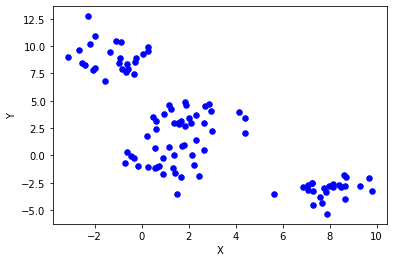

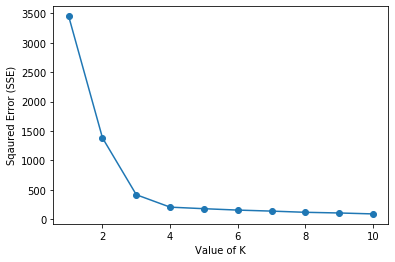

Inertia(sse) iterations
1 : 3449.4972295055236
2 : 1381.842463856216
3 : 416.35580471288165
4 : 205.12195482575788
5 : 178.74135775368384
6 : 155.1935426012094
7 : 137.83527040014877
8 : 117.48012903314333
9 : 106.03545152980706
10 : 90.0567713852881


In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
from scipy.spatial.distance import cdist

# DEFINING DATA-SETS
# make_blobs() is used to generate sample points
X, Y = make_blobs(n_samples = 100, centers = 4, cluster_std = 1, n_features = 2)
plt.scatter(X[:, 0], X[:, 1], s = 30, color ='b')

# label the axes
plt.xlabel('X')
plt.ylabel('Y')

plt.show()
plt.clf() # clear the figure

# COMPUTING K USING ELBOW-CURVE
sse =[]
inertia_val={} # for analysis purpose
for k in range(1, 11):
    km = KMeans(n_clusters = k, max_iter = 500)
    km.fit(X)
    # calculates squared error for the clustered points
    sse.append(km.inertia_)
    inertia_val[k] = km.inertia_
    
# plot k against sse 
plt.plot(range(1, 11), sse, '-o')
plt.xlabel("Value of K")
plt.ylabel("Sqaured Error (SSE)")
plt.show() # clear the plot

print("Inertia(sse) iterations")
for key, val in inertia_val.items():
    print(f'{key} : {val}')

Here we use ***Inertia***(which is sum of squared distances of samples to their closest cluster center) to determine the optimal cluster number. So, from the elbow curve we can determine that in this case the best number of cluster is 4. 

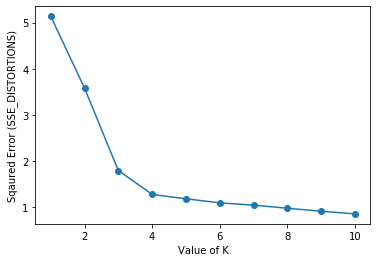

DISTORTIONS(sse) iterations
1 : 5.137981181372651
2 : 3.581478695117366
3 : 1.7938425900482502
4 : 1.2755601875482014
5 : 1.1804636045981354
6 : 1.0925405000692507
7 : 1.0430673113312903
8 : 0.9756572181234756
9 : 0.9106860068931755
10 : 0.8526871036359506


In [2]:
# COMPUTING K USING ELBOW-CURVE
distortions_val={} # for analysis purpose
sse_distortions=[]
for k in range(1, 11):
    km = KMeans(n_clusters = k, max_iter = 500)
    km.fit(X)
    # calculates squared error for the clustered points
    sse_distortions.append(sum(np.min(cdist(X, km.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    distortions_val[k]=sum(np.min(cdist(X, km.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0]

# plot k against sse_distortions 
plt.plot(range(1, 11), sse_distortions, '-o')
plt.xlabel("Value of K")
plt.ylabel("Sqaured Error (SSE_DISTORTIONS)")
plt.show() # clear the plot

print("DISTORTIONS(sse) iterations")
for key, val in distortions_val.items():
    print(f'{key} : {val}')

Here we use Distortions(which is average of squared distances from the cluster centers of their respective cluster) to determine the optimal cluster number. So, from the elbow curve we can determine that in this case the best number of cluster is 4.              
***NOTE:*** I have been seen ***Inertia*** is the preferable metrics to compute optimal cluster number.

### 2- Silhouette method
This method can be used to determine the degree of separation between clusters.
Here is the equation for silhouette:
$$
  S_{i} = \frac{b_{i} - a_{i}}{max(a_{i}, b_{i})} \\
$$

where,                                                                                      
   $S_{i}$ - is the silhouette coefficient of the data point i.                                                              
   $a_{i}$ - is the average distance between i and all the other data points in the cluster to which i belongs.                
   $b_{i}$ - is the average distance from i to all the clusters to which i doesn't belong.


The value of silhoutte coefficient lies in between [-1, 1].                                                                  
* A score of 1 denotes the best meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters.                                                                  
* The worst value is -1.                                                                                      
* Values near 0 denote overlapping clusters.                                                       

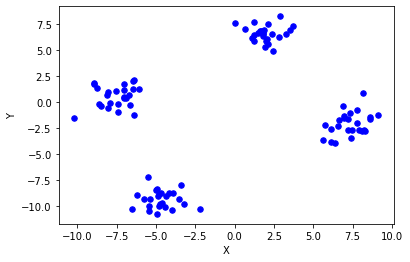

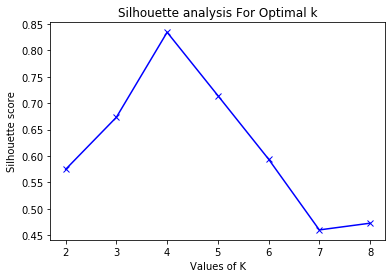

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# DEFINING DATA-SETS
# make_blobs() is used to generate sample points
X1, Y1 = make_blobs(n_samples = 100, centers = 4, cluster_std = 1, n_features = 2)
plt.clf()
plt.scatter(X1[:, 0], X1[:, 1], s = 30, color ='b')

# label the axes
plt.xlabel('X')
plt.ylabel('Y')

plt.show()
plt.clf() 

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    km = KMeans(n_clusters = num_clusters, max_iter = 500)
    km.fit(X1)
    cluster_labels = km.labels_
 
    # silhouette score
    silhouette_avg.append(silhouette_score(X1, cluster_labels))
    
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

Here we can see silhouette score is maximized at k = 4. So, we will take 4 clusters.

### 3- Gap statistic
The gap statistic compares the total intracluster variation for the different value of k(number of clusters) with their expected values under null reference distribution of the data; means it measures the variation in between observed data and random data with a random uniform variation. A large gap statistic means the clustering structure is far away from the random uniform distribution of points. 
Equation for gap statistic:
$$
Gap_{n}(k) = E_{n}^*log(W_{k}) - log(W_{k})
$$

where,                                                    
$E_{n}^*$ - denotes the expection under a sample size n from the refrerence distribution.                                
$W_{k}$ - Observed value

***NOTE:*** Even if gap statistics is a good approach to find a suitable k(number of clusters), still it's not best.

A list of 10 of the more popular algorithms is as follows:

    K-Means
    Mini-Batch K-Means
    Affinity Propagation
    Agglomerative Clustering
    BIRCH
    DBSCAN
    Mean Shift
    OPTICS
    Spectral Clustering
    Mixture of Gaussians


We will discuss these above mentioned 10 clustering algorithms in next article.

***The pupose of this article is to give a basic intution of clustering, so that in future whenever you see any ml-problems, your mind should able to start think the best approach and while solving the problem you can also explore more in depth. This is just an applied ML-knowledge sharing.***